In [1]:
# Setup for Google Colab (optional)
import sys
if 'google.colab' in sys.modules:
    print("Running in Google Colab")
    # Install required packages
    !pip install -q scikit-image matplotlib numpy scipy pillow
    
    # Set up file handling
    from google.colab import files
    print("Colab setup complete.")
else:
    print("Running in local environment")

Running in local environment


<a href="https://colab.research.google.com/github/NU-MSE-LECTURES/465-WINTER2026/blob/main/Week_03/code_examples/example_02_cameraman_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 03 Example 2: Filtering Clean vs Noisy Images - Cameraman Test

This notebook demonstrates filter performance on controlled synthetic noise.
We'll compare Gaussian and Median filters on clean and artificially-noisy versions of the classic cameraman image.

## Overview

### Why Use Test Images?
- **Reproducible**: Same image every time
- **Known noise properties**: We control what noise is added
- **Quantifiable**: Can measure exact improvements
- **Educational**: Clear visual demonstration of filter effects

### Experiment Design:
1. Start with **clean cameraman image** (standard test image)
2. Create **noisy version** (add Gaussian or salt & pepper noise)
3. Apply both **Gaussian and Median filters**
4. Compare **noise reduction effectiveness**
5. Measure **structural detail preservation**

## 1. Load Clean Image and Create Noisy Version

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, util
from scipy import ndimage

# Load the cameraman test image
image_clean = data.camera()
print(f"Loaded cameraman image")
print(f"Shape: {image_clean.shape}")
print(f"Data type: {image_clean.dtype}")
print(f"Value range: [{image_clean.min()}, {image_clean.max()}]")
print(f"Mean: {image_clean.mean():.2f}, Std: {image_clean.std():.2f}")

Loaded cameraman image
Shape: (512, 512)
Data type: uint8
Value range: [0, 255]
Mean: 129.06, Std: 73.64


## 2. Add Noise to Create Test Versions

In [3]:
# Create different noise versions
np.random.seed(42)  # For reproducibility

# Gaussian noise (similar to electronic detector noise)
noise_std = 20  # Standard deviation of Gaussian noise
image_gaussian_noise = image_clean.astype(float) + np.random.normal(0, noise_std, image_clean.shape)
image_gaussian_noise = np.clip(image_gaussian_noise, 0, 255)  # Clip to valid range

# Salt & Pepper noise (like outlier events)
image_salt_pepper = util.random_noise(image_clean.astype(float) / 255.0, mode='s&p', amount=0.1)
image_salt_pepper = (image_salt_pepper * 255).astype(float)

print("Noise versions created:")
print(f"\nGaussian Noise (σ={noise_std}):")
print(f"  Range: [{image_gaussian_noise.min():.2f}, {image_gaussian_noise.max():.2f}]")
print(f"  Mean: {image_gaussian_noise.mean():.2f}, Std: {image_gaussian_noise.std():.2f}")

print(f"\nSalt & Pepper Noise (10%):")
print(f"  Range: [{image_salt_pepper.min():.2f}, {image_salt_pepper.max():.2f}]")
print(f"  Mean: {image_salt_pepper.mean():.2f}, Std: {image_salt_pepper.std():.2f}")

Noise versions created:

Gaussian Noise (σ=20):
  Range: [0.00, 255.00]
  Mean: 129.49, Std: 75.33

Salt & Pepper Noise (10%):
  Range: [0.00, 255.00]
  Mean: 128.75, Std: 80.73


## 3. Visualize Clean vs Noisy Images

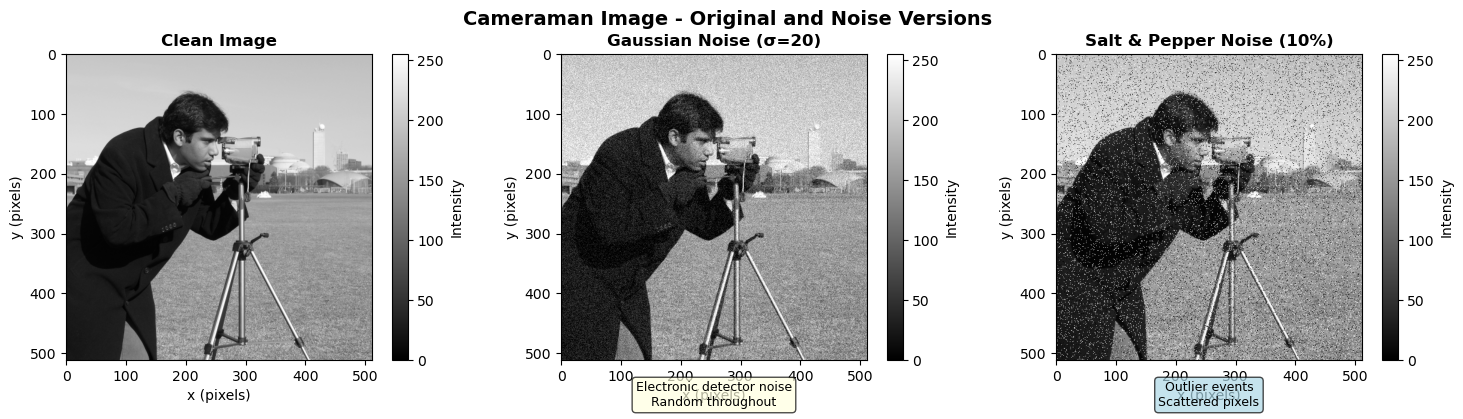

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Cameraman Image - Original and Noise Versions', fontsize=14, fontweight='bold')

# Clean
im0 = axes[0].imshow(image_clean, cmap='gray')
axes[0].set_title('Clean Image', fontsize=12, fontweight='bold')
axes[0].set_xlabel('x (pixels)')
axes[0].set_ylabel('y (pixels)')
plt.colorbar(im0, ax=axes[0], label='Intensity')

# Gaussian Noise
im1 = axes[1].imshow(image_gaussian_noise, cmap='gray')
axes[1].set_title(f'Gaussian Noise (σ={noise_std})', fontsize=12, fontweight='bold')
axes[1].text(0.5, -0.15, 'Electronic detector noise\nRandom throughout', 
             transform=axes[1].transAxes, ha='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
axes[1].set_xlabel('x (pixels)')
axes[1].set_ylabel('y (pixels)')
plt.colorbar(im1, ax=axes[1], label='Intensity')

# Salt & Pepper Noise
im2 = axes[2].imshow(image_salt_pepper, cmap='gray')
axes[2].set_title('Salt & Pepper Noise (10%)', fontsize=12, fontweight='bold')
axes[2].text(0.5, -0.15, 'Outlier events\nScattered pixels', 
             transform=axes[2].transAxes, ha='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
axes[2].set_xlabel('x (pixels)')
axes[2].set_ylabel('y (pixels)')
plt.colorbar(im2, ax=axes[2], label='Intensity')

plt.tight_layout()
plt.show()

## 4. Apply Filters to Gaussian Noise Case

Filtering Gaussian Noise Case...



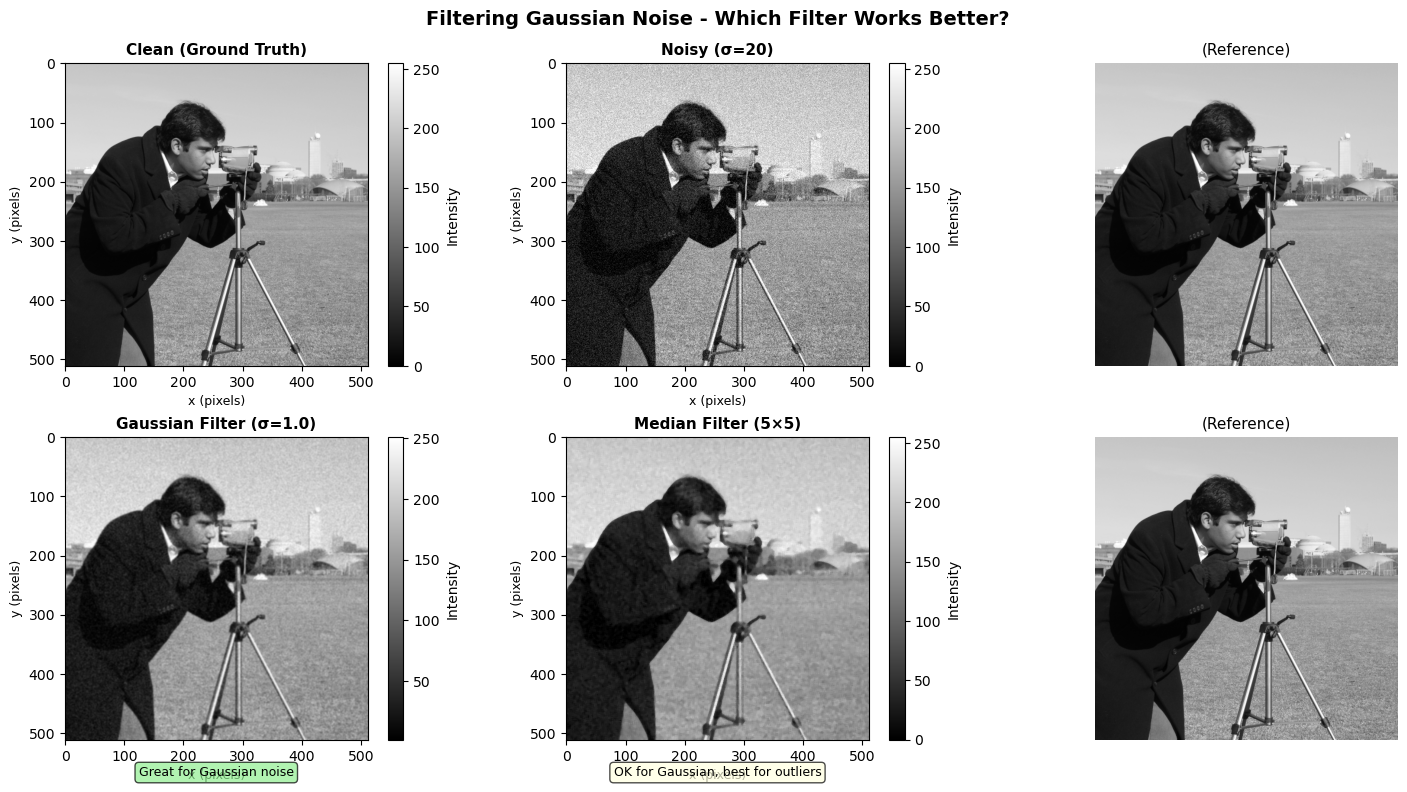

In [5]:
print("Filtering Gaussian Noise Case...\n")

# Apply filters
gaussian_filtered = filters.gaussian(image_gaussian_noise, sigma=1.0)
median_filtered = ndimage.median_filter(image_gaussian_noise, footprint=np.ones((5, 5)))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Filtering Gaussian Noise - Which Filter Works Better?', fontsize=14, fontweight='bold')

# Row 1: Full image
im00 = axes[0, 0].imshow(image_clean, cmap='gray')
axes[0, 0].set_title('Clean (Ground Truth)', fontsize=11, fontweight='bold')
plt.colorbar(im00, ax=axes[0, 0], label='Intensity')

im01 = axes[0, 1].imshow(image_gaussian_noise, cmap='gray')
axes[0, 1].set_title('Noisy (σ=20)', fontsize=11, fontweight='bold')
plt.colorbar(im01, ax=axes[0, 1], label='Intensity')

im02 = axes[0, 2].imshow(image_clean, cmap='gray')
axes[0, 2].set_title('(Reference)', fontsize=11)
axes[0, 2].axis('off')

# Row 2: Filtered results
im10 = axes[1, 0].imshow(gaussian_filtered, cmap='gray')
axes[1, 0].set_title('Gaussian Filter (σ=1.0)', fontsize=11, fontweight='bold')
axes[1, 0].text(0.5, -0.12, 'Great for Gaussian noise', 
                transform=axes[1, 0].transAxes, ha='center', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
plt.colorbar(im10, ax=axes[1, 0], label='Intensity')

im11 = axes[1, 1].imshow(median_filtered, cmap='gray')
axes[1, 1].set_title('Median Filter (5×5)', fontsize=11, fontweight='bold')
axes[1, 1].text(0.5, -0.12, 'OK for Gaussian, best for outliers', 
                transform=axes[1, 1].transAxes, ha='center', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
plt.colorbar(im11, ax=axes[1, 1], label='Intensity')

im12 = axes[1, 2].imshow(image_clean, cmap='gray')
axes[1, 2].set_title('(Reference)', fontsize=11)
axes[1, 2].axis('off')

for ax in axes.flat:
    ax.set_xlabel('x (pixels)', fontsize=9)
    ax.set_ylabel('y (pixels)', fontsize=9)

plt.tight_layout()
plt.show()

## 5. Apply Filters to Salt & Pepper Noise Case

Filtering Salt & Pepper Noise Case...



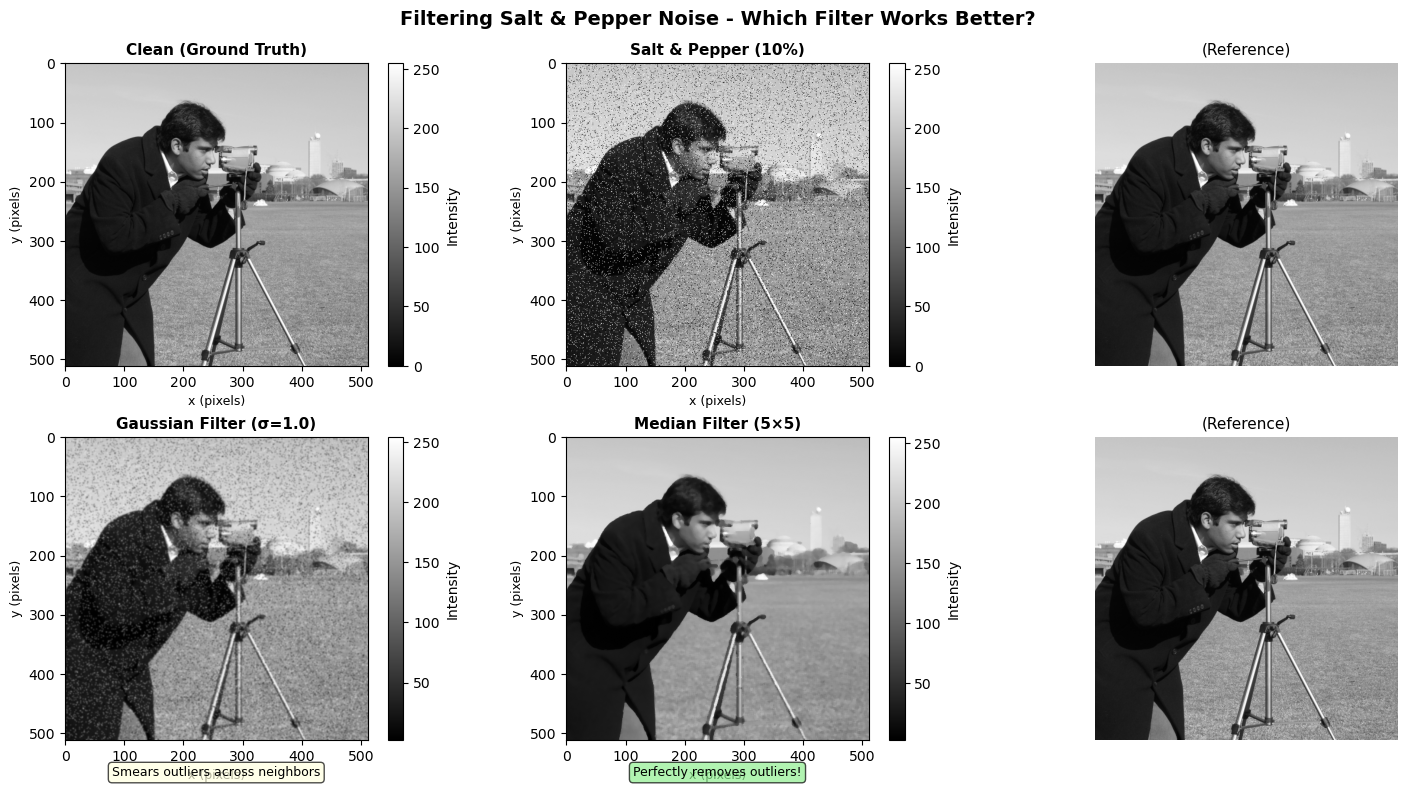

In [6]:
print("Filtering Salt & Pepper Noise Case...\n")

# Apply filters
gaussian_sp = filters.gaussian(image_salt_pepper, sigma=1.0)
median_sp = ndimage.median_filter(image_salt_pepper, footprint=np.ones((5, 5)))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Filtering Salt & Pepper Noise - Which Filter Works Better?', fontsize=14, fontweight='bold')

# Row 1: Full image
im00 = axes[0, 0].imshow(image_clean, cmap='gray')
axes[0, 0].set_title('Clean (Ground Truth)', fontsize=11, fontweight='bold')
plt.colorbar(im00, ax=axes[0, 0], label='Intensity')

im01 = axes[0, 1].imshow(image_salt_pepper, cmap='gray')
axes[0, 1].set_title('Salt & Pepper (10%)', fontsize=11, fontweight='bold')
plt.colorbar(im01, ax=axes[0, 1], label='Intensity')

im02 = axes[0, 2].imshow(image_clean, cmap='gray')
axes[0, 2].set_title('(Reference)', fontsize=11)
axes[0, 2].axis('off')

# Row 2: Filtered results
im10 = axes[1, 0].imshow(gaussian_sp, cmap='gray')
axes[1, 0].set_title('Gaussian Filter (σ=1.0)', fontsize=11, fontweight='bold')
axes[1, 0].text(0.5, -0.12, 'Smears outliers across neighbors', 
                transform=axes[1, 0].transAxes, ha='center', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
plt.colorbar(im10, ax=axes[1, 0], label='Intensity')

im11 = axes[1, 1].imshow(median_sp, cmap='gray')
axes[1, 1].set_title('Median Filter (5×5)', fontsize=11, fontweight='bold')
axes[1, 1].text(0.5, -0.12, 'Perfectly removes outliers!', 
                transform=axes[1, 1].transAxes, ha='center', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
plt.colorbar(im11, ax=axes[1, 1], label='Intensity')

im12 = axes[1, 2].imshow(image_clean, cmap='gray')
axes[1, 2].set_title('(Reference)', fontsize=11)
axes[1, 2].axis('off')

for ax in axes.flat:
    ax.set_xlabel('x (pixels)', fontsize=9)
    ax.set_ylabel('y (pixels)', fontsize=9)

plt.tight_layout()
plt.show()

## 6. Quantitative Error Analysis

In [7]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

print("=" * 70)
print("QUANTITATIVE NOISE REDUCTION ANALYSIS")
print("=" * 70)

# Calculate MSE (Mean Squared Error) vs clean image
print("\n--- GAUSSIAN NOISE CASE ---")
mse_noisy_gauss = mean_squared_error(image_clean, image_gaussian_noise)
mse_gaussian_filtered = mean_squared_error(image_clean, gaussian_filtered)
mse_median_filtered = mean_squared_error(image_clean, median_filtered)

print(f"\nNoisy image MSE:           {mse_noisy_gauss:.2f}")
print(f"After Gaussian filter:     {mse_gaussian_filtered:.2f} (reduction: {(1 - mse_gaussian_filtered/mse_noisy_gauss)*100:.1f}%)")
print(f"After Median filter:       {mse_median_filtered:.2f} (reduction: {(1 - mse_median_filtered/mse_noisy_gauss)*100:.1f}%)")
print(f"\n→ Winner for Gaussian noise: Gaussian filter")

# Salt & Pepper case
print(f"\n--- SALT & PEPPER NOISE CASE ---")
mse_noisy_sp = mean_squared_error(image_clean, image_salt_pepper)
mse_gaussian_sp = mean_squared_error(image_clean, gaussian_sp)
mse_median_sp = mean_squared_error(image_clean, median_sp)

print(f"\nNoisy image MSE:           {mse_noisy_sp:.2f}")
print(f"After Gaussian filter:     {mse_gaussian_sp:.2f} (reduction: {(1 - mse_gaussian_sp/mse_noisy_sp)*100:.1f}%)")
print(f"After Median filter:       {mse_median_sp:.2f} (reduction: {(1 - mse_median_sp/mse_noisy_sp)*100:.1f}%)")
print(f"\n→ Winner for Salt & Pepper: Median filter")

print("\n" + "=" * 70)

QUANTITATIVE NOISE REDUCTION ANALYSIS

--- GAUSSIAN NOISE CASE ---

Noisy image MSE:           373.31
After Gaussian filter:     104.73 (reduction: 71.9%)
After Median filter:       134.54 (reduction: 64.0%)

→ Winner for Gaussian noise: Gaussian filter

--- SALT & PEPPER NOISE CASE ---

Noisy image MSE:           2173.74
After Gaussian filter:     302.75 (reduction: 86.1%)
After Median filter:       111.18 (reduction: 94.9%)

→ Winner for Salt & Pepper: Median filter



## 7. Close-up Region of Interest Comparison

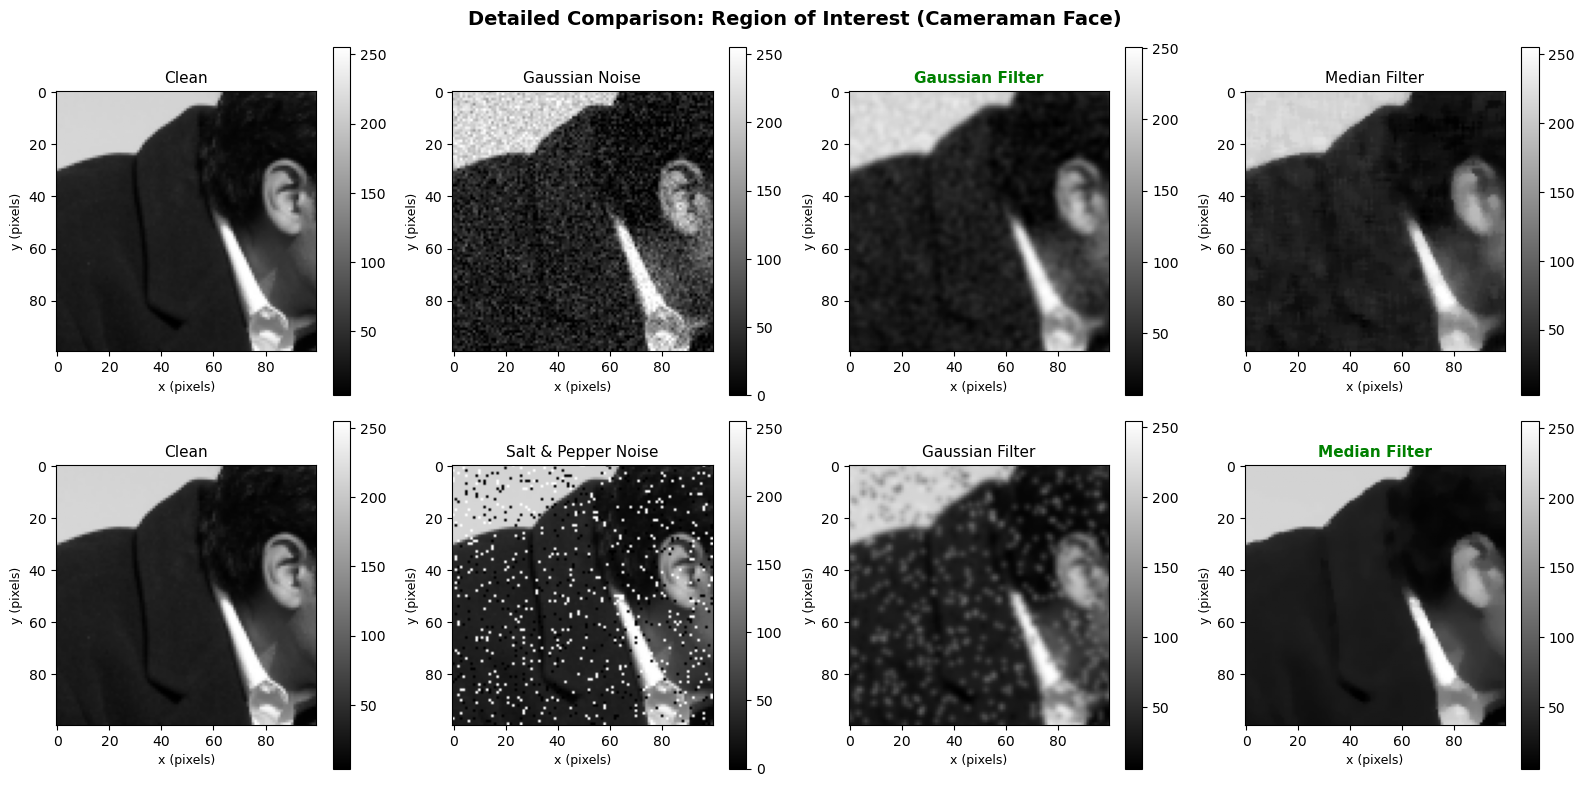

In [8]:
# Extract a small ROI showing fine details (cameraman's face)
roi_y = slice(100, 200)
roi_x = slice(100, 200)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Detailed Comparison: Region of Interest (Cameraman Face)', fontsize=14, fontweight='bold')

# Gaussian noise row
im = axes[0, 0].imshow(image_clean[roi_y, roi_x], cmap='gray')
axes[0, 0].set_title('Clean', fontsize=11)
plt.colorbar(im, ax=axes[0, 0])

im = axes[0, 1].imshow(image_gaussian_noise[roi_y, roi_x], cmap='gray')
axes[0, 1].set_title('Gaussian Noise', fontsize=11)
plt.colorbar(im, ax=axes[0, 1])

im = axes[0, 2].imshow(gaussian_filtered[roi_y, roi_x], cmap='gray')
axes[0, 2].set_title('Gaussian Filter', fontsize=11, color='green', fontweight='bold')
plt.colorbar(im, ax=axes[0, 2])

im = axes[0, 3].imshow(median_filtered[roi_y, roi_x], cmap='gray')
axes[0, 3].set_title('Median Filter', fontsize=11)
plt.colorbar(im, ax=axes[0, 3])

# Salt & Pepper row
im = axes[1, 0].imshow(image_clean[roi_y, roi_x], cmap='gray')
axes[1, 0].set_title('Clean', fontsize=11)
plt.colorbar(im, ax=axes[1, 0])

im = axes[1, 1].imshow(image_salt_pepper[roi_y, roi_x], cmap='gray')
axes[1, 1].set_title('Salt & Pepper Noise', fontsize=11)
plt.colorbar(im, ax=axes[1, 1])

im = axes[1, 2].imshow(gaussian_sp[roi_y, roi_x], cmap='gray')
axes[1, 2].set_title('Gaussian Filter', fontsize=11)
plt.colorbar(im, ax=axes[1, 2])

im = axes[1, 3].imshow(median_sp[roi_y, roi_x], cmap='gray')
axes[1, 3].set_title('Median Filter', fontsize=11, color='green', fontweight='bold')
plt.colorbar(im, ax=axes[1, 3])

for ax in axes.flat:
    ax.set_xlabel('x (pixels)', fontsize=9)
    ax.set_ylabel('y (pixels)', fontsize=9)

plt.tight_layout()
plt.show()

## 8. Summary: Filter Selection Guide

### From This Experiment:

| Scenario | Noise Type | Best Filter | Why? |
|----------|-----------|-----------|-----|
| STEM detector | Gaussian (electronic noise) | **Gaussian** | Designed for this type of noise; very smooth results |
| Outlier events | Salt & Pepper (impulse) | **Median** | Rank-order operation removes outliers perfectly |
| Real data | Mixed noise | **Combination or Bilateral** | Start with appropriate filter; validate with ROI analysis |

### Practical Recommendations:

**Step 1: Understand Your Noise**
- Is it random (Gaussian)?
- Are there outlier events (salt & pepper)?
- Check with a clean reference or literature

**Step 2: Choose Initial Filter Parameters**
- Gaussian: start with σ = 0.5-1.0 pixels
- Median: start with 3×3 or 5×5 footprint

**Step 3: Validate Results**
- Compare with clean reference (if available)
- Extract ROI and inspect fine details
- Calculate quantitative metrics (MSE, SSIM, etc.)
- Check that important structures are preserved

**Step 4: Iterate**
- If over-filtered: reduce filter strength
- If under-filtered: increase filter strength
- Consider hybrid approaches (e.g., bilateral filter)